In [21]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seed=7
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


### 資料的預處理

* 將特徵資料 (樣本數, 28, 28) 形狀轉換成 (樣本數, 784) 形狀

* 將特徵資料正規化

* 將標籤資料執行 one-hot 編碼

In [22]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")

X_train shape : (60000, 784)
X_test shape : (10000, 784)


In [23]:
# 執行正規化
X_train = X_train / 255
X_teest = X_test / 255
X_train[0][150:175]

array([0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333336, 0.6862745 , 0.10196079,
       0.6509804 , 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [24]:
# 將標籤資料編碼
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(f"Y_train shape : {Y_train.shape}")
print(Y_train[0])

Y_train shape : (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 使用MLP打造mnist手寫辨識

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 建立模型
model = Sequential()
model.add(Dense(256, input_dim = 28*28, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

# 編譯模型
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10, batch_size = 128, verbose = 2)

loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練資料集的準確度 : {accuracy}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試資料集的準確度 : {accuracy}")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
375/375 - 1s - loss: 0.3411 - accuracy: 0.9050 - val_loss: 0.1886 - val_accuracy: 0.9467
Epoch 2/10
375/375 - 1s - loss: 0.1507 - accuracy: 0.9571 - val_loss: 0.1273 - val_accuracy: 0.9634
Epoch 3/10
375/375 - 1s - loss: 0.1026 - accuracy: 0.9712 - val_loss: 0.1060 - val_accuracy: 0.9685
Epoch 4/10
375/375 - 1s - loss: 0.0775 - accuracy: 0.9777 - val_loss: 0.0934 - val_accuracy: 0.9712
Epoch 5/10
375/375 - 1s - loss: 0.0589 - accuracy: 0.9829 - val_loss: 0.0968 - val_accuracy: 0.9710
Epoch 6/10

由分析結果資料得知，驗證資料集的準確度是 99% ，測試資料集的準確度是 97%

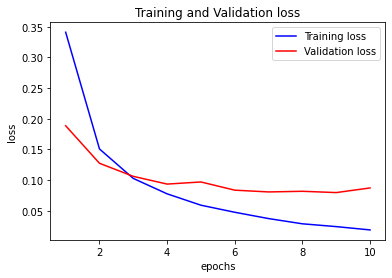

In [38]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "b-",label = "Training loss")
plt.plot(epochs, val_loss, "r-",label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

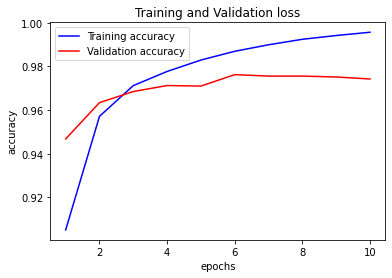

In [46]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1 , len(loss)+1)

plt.plot(epochs, acc, "b-", label = "Training accuracy")
plt.plot(epochs, val_acc, "r-", label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

由圖表可以看出，隨著訓練週期的增加，訓練損失和驗證損失都是持續減少，驗證損失的減少比起訓練損失可以說是越來越慢；相同的，訓練準確度持續提升，但是驗證資料的準確度提升越來越小。

表示仍然有過度擬合的現象。

### 增加隱藏層的神經元試看看

In [47]:

seed=7
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#轉換特徵資料形狀
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")

# 執行正規化
X_train = X_train / 255
X_teest = X_test / 255
X_train[0][150:175]

# 將標籤資料編碼

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(f"Y_train shape : {Y_train.shape}")
print(Y_train[0])

# 建立模型，神經元數由 256 改為 784
model = Sequential()
model.add(Dense(784, input_dim = 28*28, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

# 編譯模型
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10, batch_size = 128, verbose = 2)

loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練資料集的準確度 : {accuracy}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試資料集的準確度 : {accuracy}")

Y_train shape : (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
375/375 - 2s - loss: 0.2709 - accuracy: 0.9217 - val_loss: 0.1428 - val_accuracy: 0.9581
Epoch 2/10
375/375 - 2s - loss: 0.1103 - accuracy: 0.9679 - val_loss: 0.1040 - val_accuracy: 0.9698
Epoch 3/10
375/375 - 2s - loss: 0.0710 - accuracy: 0.9789 - val_loss: 0.0858 - val_accuracy: 0.9756
Epoch 4/10
375/375 - 2s - loss: 0.0472 - accuracy: 0.9865 - val_loss: 0.0800 - val_accuracy: 0.9746
Epoch 5/10
375/375 - 2s - loss: 0.0343 - accuracy:

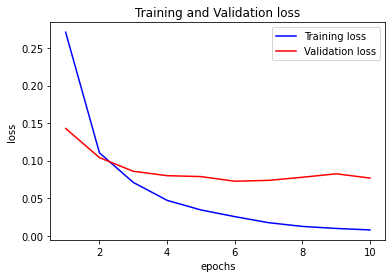

In [48]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "b-",label = "Training loss")
plt.plot(epochs, val_loss, "r-",label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

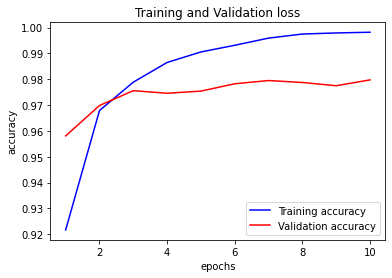

In [49]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1 , len(loss)+1)

plt.plot(epochs, acc, "b-", label = "Training accuracy")
plt.plot(epochs, val_acc, "r-", label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

增加神經元術後由資料圖表發現，仍然無法解決過度擬合的現象。

### 在MLP新增一層隱藏層

In [50]:

seed=7
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#轉換特徵資料形狀
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")

# 執行正規化
X_train = X_train / 255
X_teest = X_test / 255
X_train[0][150:175]

# 將標籤資料編碼

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(f"Y_train shape : {Y_train.shape}")
print(Y_train[0])

# 建立模型，增加一層隱藏層
model = Sequential()
model.add(Dense(256, input_dim = 28*28, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

# 編譯模型
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10, batch_size = 128, verbose = 2)

loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練資料集的準確度 : {accuracy}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試資料集的準確度 : {accuracy}")

Y_train shape : (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
375/375 - 1s - loss: 0.2906 - accuracy: 0.9152 - val_loss: 0.1468 - val_accuracy: 0.9558
Epoch 2/10
375/375 - 1s - loss: 0.1106 - accuracy: 0.9671 - val_loss: 0.1111 - val_accuracy: 0.9670
Epoch 3/10
375/375 - 1s - loss: 0.0715 - accuracy: 0.9784 - val_loss: 0.0945 - val_accuracy: 0.9718
Epoch 4/10
375/375

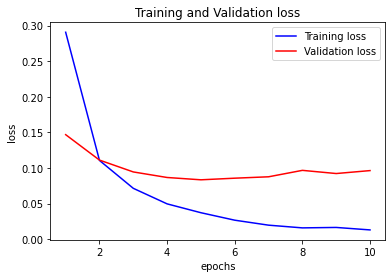

In [51]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "b-",label = "Training loss")
plt.plot(epochs, val_loss, "r-",label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

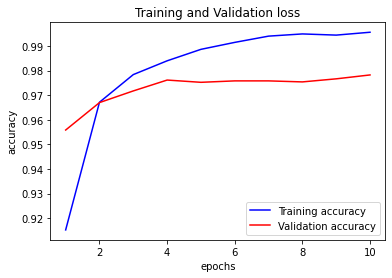

In [52]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1 , len(loss)+1)

plt.plot(epochs, acc, "b-", label = "Training accuracy")
plt.plot(epochs, val_acc, "r-", label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

再次由資料圖表發現，增加隱藏層也是無法解決過度擬合的現象。

### 在MLP使用 Dropout 層

In [54]:
from tensorflow.keras.layers import Dropout

seed=7
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#轉換特徵資料形狀
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")

# 執行正規化
X_train = X_train / 255
X_teest = X_test / 255
X_train[0][150:175]

# 將標籤資料編碼

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 建立模型，增加 Dopout 層
model = Sequential()
model.add(Dense(256, input_dim = 28*28, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

# 編譯模型
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10, batch_size = 128, verbose = 2)

loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練資料集的準確度 : {accuracy}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試資料集的準確度 : {accuracy}")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
375/375 - 1s - loss: 0.4479 - accuracy: 0.8676 - val_loss: 0.1989 - val_accuracy: 0.9437
Epoch 2/10
375/375 - 1s - loss: 0.2226 - accuracy: 0.9355 - val_loss: 0.1466 - val_accuracy: 0.9578
Epoch 3/10
375/375 - 1s - loss: 0.1723 - accuracy: 0.9496 - val_loss: 0.1185 - val_accuracy: 0.9665
Epoch 4/10
375/375 - 1s - loss: 0.1447 - accuracy: 0.9584 - val_loss: 0.1047 -

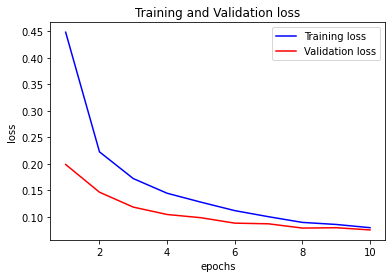

In [55]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "b-",label = "Training loss")
plt.plot(epochs, val_loss, "r-",label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

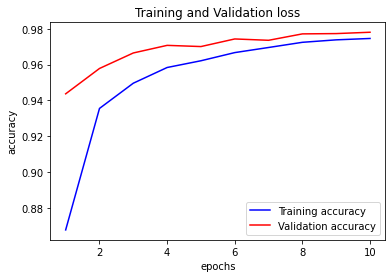

In [56]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1 , len(loss)+1)

plt.plot(epochs, acc, "b-", label = "Training accuracy")
plt.plot(epochs, val_acc, "r-", label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

由資料圖表可以看到，訓練損失合驗證損失都是持續在減少，差距也越來越小至連在一起；另，訓練準確度與驗證準確度都持續在提升，差距也越來越小。

故我們可以發現，**在 MLP 增加 Dropout 層可以解決過度擬合的問題。**